Data upload and preprocessing

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving 1pharma-data.csv to 1pharma-data (1).csv


In [ ]:
df = pd.read_csv('1pharma-data.csv')

In [ ]:
df.head()

,Distributor,Customer Name,City,Country,Latitude,Longitude,Channel,Sub-channel,Product_ID,Product Class,Quantity,Price,Sales,Month,Year,Name of Sales Rep,Manager,Sales Team
0,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,51.2333,22.5667,Hospital,Private,Topipizole,Mood Stabilizers,4.0,368,1472.0,January,2018,Mary Gerrard,Britanny Bold,Delta
1,Gottlieb-Cruickshank,Feest PLC,Świecie,Poland,53.4167,18.4333,Pharmacy,Retail,Choriotrisin,Antibiotics,7.0,591,4137.0,January,2018,Jessica Smith,Britanny Bold,Delta
2,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,50.0833,18.5000,Pharmacy,Institution,Acantaine,Antibiotics,30.0,66,1980.0,January,2018,Steve Pepple,Tracy Banks,Bravo
3,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,Czeladź,Poland,50.3333,19.0833,Hospital,Private,Lioletine Refliruvax,Analgesics,6.0,435,2610.0,January,2018,Mary Gerrard,Britanny Bold,Delta
4,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,53.7800,20.4942,Pharmacy,Retail,Oxymotroban Fexoformin,Analgesics,20.0,458,9160.0,January,2018,Anne Wu,Britanny Bold,Delta


Data Exploration and Cleaning

In [ ]:
print(df.columns.tolist())


['Distributor', 'Customer Name', 'City', 'Country', 'Latitude', 'Longitude', 'Channel', 'Sub-channel', 'Product_ID', 'Product Class', 'Quantity', 'Price', 'Sales', 'Month', 'Year', 'Name of Sales Rep', 'Manager', 'Sales Team']


In [ ]:
df.drop(['Channel', 'Sub-channel', 'Product Class', 'Name of Sales Rep', 'Manager', 'Sales Team'], axis=1, inplace=True)

In [ ]:
print(df['Month'].unique())

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


In [ ]:
month_to_int = {
    'January': 1,'February': 2,'March': 3,
    'April': 4,'May': 5,'June': 6,'July': 7,
    'August': 8,'September': 9,'October': 10,
    'November': 11,'December': 12
}

df['Month'] = df['Month'].map(month_to_int)

df.head()


,Distributor,Customer Name,City,Country,Latitude,Longitude,Product_ID,Quantity,Price,Sales,Month,Year
0,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,51.2333,22.5667,Topipizole,4.0,368,1472.0,1,2018
1,Gottlieb-Cruickshank,Feest PLC,Świecie,Poland,53.4167,18.4333,Choriotrisin,7.0,591,4137.0,1,2018
2,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,50.0833,18.5000,Acantaine,30.0,66,1980.0,1,2018
3,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,Czeladź,Poland,50.3333,19.0833,Lioletine Refliruvax,6.0,435,2610.0,1,2018
4,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,53.7800,20.4942,Oxymotroban Fexoformin,20.0,458,9160.0,1,2018


In [ ]:
#print(df['Product_ID'].unique())

Feature Engineering

Dataset Scaling

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df_scaled = scaler.fit_transform((df[numeric_cols]))

In [ ]:
df1 = pd.DataFrame(df_scaled, columns=numeric_cols)

In [ ]:
df1 = df1.join(df.select_dtypes(exclude=np.number))

In [ ]:
df1.head()

,Latitude,Longitude,Quantity,Price,Sales,Year,Distributor,Customer Name,City,Country,Product_ID
0,0.511730,0.942801,0.057724,0.448187,0.053123,0.333333,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,Topipizole
1,0.812155,0.706376,0.057748,0.737047,0.053157,0.333333,Gottlieb-Cruickshank,Feest PLC,Świecie,Poland,Choriotrisin
2,0.353496,0.710191,0.057933,0.056995,0.053129,0.333333,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,Acantaine
3,0.387894,0.743555,0.057740,0.534974,0.053137,0.333333,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,Czeladź,Poland,Lioletine Refliruvax
4,0.862143,0.824257,0.057853,0.564767,0.053221,0.333333,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,Oxymotroban Fexoformin


<Axes: title={'center': 'Quantity: After Normalization'}, xlabel='Quantity', ylabel='Density'>

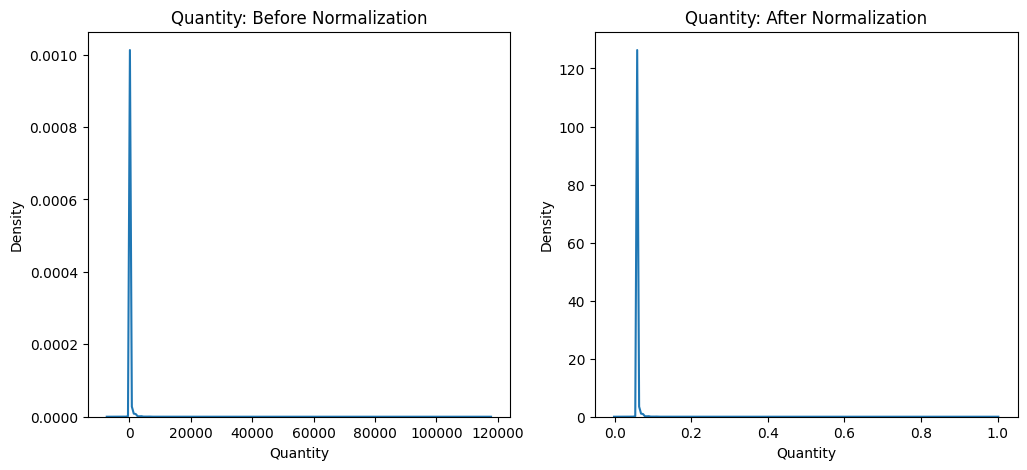

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Quantity: Before Normalization')
sns.kdeplot(df['Quantity'], ax=ax1)

ax2.set_title('Quantity: After Normalization')
sns.kdeplot(df1['Quantity'], ax=ax2)

Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df1.dropna(axis=0, subset=['Quantity'], inplace=True)
y = df1.Quantity
X = df1.drop(['Quantity'], axis=1).select_dtypes(exclude=['object'])

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X

,Latitude,Longitude,Price,Sales,Year
0,0.511730,0.942801,0.448187,0.053123,0.333333
1,0.812155,0.706376,0.737047,0.053157,0.333333
2,0.353496,0.710191,0.056995,0.053129,0.333333
3,0.387894,0.743555,0.534974,0.053137,0.333333
4,0.862143,0.824257,0.564767,0.053221,0.333333
...,...,...,...,...,...
254077,0.274654,0.297056,0.615285,0.058932,1.000000
254078,0.128762,0.288825,0.853627,0.056858,1.000000
254079,0.825915,0.117229,0.849741,0.055872,1.000000
254080,0.160862,0.166803,0.120466,0.053933,1.000000


In [ ]:
y

,Quantity
0,0.057724
1,0.057748
2,0.057933
3,0.057740
4,0.057853
...,...
254077,0.065056
254078,0.061154
254079,0.060256
254080,0.062220


XGBoost Algorithm

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(train_X, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model.predict(test_X)

array([0.05775097, 0.05776051, 0.05769977, ..., 0.05790852, 0.05785408,
       0.05769977], dtype=float32)

In [ ]:
y_predict = model.predict(test_X)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

In [ ]:
mean_squared_error(test_y, y_predict)

1.9161973933912486e-05

In [ ]:
mean_absolute_error(test_y, y_predict)

0.00021801006396241255

In [ ]:
 mean_absolute_percentage_error(test_y, y_predict)

0.0023022757364573056

In [ ]:
 root_mean_squared_error(test_y, y_predict)

0.004377439198197102

In [ ]:
pip install m5-wrmsse

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.0 MB/s eta 0:00:00


In [ ]:
from m5_wrmsse import wrmsse

In [ ]:
y_pred = np.ones((30490,28))

In [ ]:
wrmsse_score = wrmsse(y_pred)

In [ ]:
print(wrmsse_score)

2.563051076566426


Model tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 7],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "gamma": [0, 0.1],
   }

In [ ]:
grid_search = GridSearchCV(estimator= XGBRegressor(), param_grid= param_grid, cv=5, verbose=1)

In [ ]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 7],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000],
                         'subsample': [0.8, 1.0]},
             verbose=1)

In [ ]:
grid_search.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 800,
 'subsample': 1.0}

In [ ]:
grid_search.best_estimator_.predict(test_X)

array([0.0577478 , 0.0577748 , 0.05770995, ..., 0.05788808, 0.05779059,
       0.05768708], dtype=float32)

In [ ]:
y_pred_tuned = grid_search.best_estimator_.predict(test_X)

In [ ]:
mean_squared_error(test_y, y_pred_tuned)

1.2432490322433438e-05

In [ ]:
mean_absolute_error(test_y, y_pred_tuned)

0.0002200053172871931

In [ ]:
mean_absolute_percentage_error(test_y, y_pred_tuned)

0.002448982142046014

In [ ]:
 root_mean_squared_error(test_y, y_pred_tuned)

0.003525973670127648

In [ ]:
from m5_wrmsse import wrmsse

In [ ]:
y_pred_tuned = np.ones((30490,28))

In [ ]:
wrmsse_score = wrmsse(y_pred_tuned)
print(wrmsse_score)

2.563051076566426


Using the model to forecast